In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

from time import time
from datetime import datetime, date
import os

In [2]:
os.chdir(r'N:\ALGORITHMIC MARKETING\ASSIGNMENTS\ADM_Assignment2')

In [3]:
df_sales = pd.read_csv('2019_Ecomm_Sales_Behavior.csv')

In [4]:
df_sales = df_sales.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df_sales.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-11 16:57:06 UTC,view,5016,183,appliances.kitchen.oven,artel,36.01,1095536,5342766
1,2019-10-27 14:23:53 UTC,view,4240,43,electronics.video.tv,lg,2445.08,1153084,4600705
2,2019-11-25 12:57:47 UTC,view,7721,208,appliances.environment.vacuum,philips,257.38,364298,5991663
3,2019-11-12 19:50:55 UTC,view,597,71,electronics.smartphone,huawei,163.20,3536496,9397681
4,2019-11-13 04:59:13 UTC,view,13709,70,electronics.telephone,nokia,21.85,3542250,8711820


In [5]:
df_sales['Event_date'] = df_sales.event_time.apply(lambda x: x.split(' ')[0])
df_sales['Event_time'] = df_sales.event_time.apply(lambda x: x.split(' ')[1])
df_sales['Event_timezone'] = df_sales.event_time.apply(lambda x: x.split(' ')[2])

In [6]:
df_sales.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Event_date,Event_time,Event_timezone
0,2019-10-11 16:57:06 UTC,view,5016,183,appliances.kitchen.oven,artel,36.01,1095536,5342766,2019-10-11,16:57:06,UTC
1,2019-10-27 14:23:53 UTC,view,4240,43,electronics.video.tv,lg,2445.08,1153084,4600705,2019-10-27,14:23:53,UTC
2,2019-11-25 12:57:47 UTC,view,7721,208,appliances.environment.vacuum,philips,257.38,364298,5991663,2019-11-25,12:57:47,UTC
3,2019-11-12 19:50:55 UTC,view,597,71,electronics.smartphone,huawei,163.20,3536496,9397681,2019-11-12,19:50:55,UTC
4,2019-11-13 04:59:13 UTC,view,13709,70,electronics.telephone,nokia,21.85,3542250,8711820,2019-11-13,04:59:13,UTC


In [7]:
df_sales['Day_of_Week'] = df_sales.Event_date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d').strftime('%A'))

In [8]:
def check_value(category):
    try:
        sub = category.split('.')[2]
        return True
    except:
        sub = ''
        return False

In [9]:
df_sales['Category'] = df_sales.category_code.apply(lambda x: x.split('.')[0])
df_sales['Sub_category_1'] = df_sales.category_code.apply(lambda x: x.split('.')[1])
df_sales['Sub_category_2'] = df_sales.category_code.apply(lambda x: x.split('.')[2] if check_value(x)
                                                         else x.split('.')[1])

In [10]:
df_sales.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Event_date,Event_time,Event_timezone,Day_of_Week,Category,Sub_category_1,Sub_category_2
0,2019-10-11 16:57:06 UTC,view,5016,183,appliances.kitchen.oven,artel,36.01,1095536,5342766,2019-10-11,16:57:06,UTC,Friday,appliances,kitchen,oven
1,2019-10-27 14:23:53 UTC,view,4240,43,electronics.video.tv,lg,2445.08,1153084,4600705,2019-10-27,14:23:53,UTC,Sunday,electronics,video,tv
2,2019-11-25 12:57:47 UTC,view,7721,208,appliances.environment.vacuum,philips,257.38,364298,5991663,2019-11-25,12:57:47,UTC,Monday,appliances,environment,vacuum
3,2019-11-12 19:50:55 UTC,view,597,71,electronics.smartphone,huawei,163.20,3536496,9397681,2019-11-12,19:50:55,UTC,Tuesday,electronics,smartphone,smartphone
4,2019-11-13 04:59:13 UTC,view,13709,70,electronics.telephone,nokia,21.85,3542250,8711820,2019-11-13,04:59:13,UTC,Wednesday,electronics,telephone,telephone


In [11]:
df_sales = df_sales.drop(columns=['event_time','category_code'])
df_sales.head(10)

,event_type,product_id,category_id,brand,price,user_id,user_session,Event_date,Event_time,Event_timezone,Day_of_Week,Category,Sub_category_1,Sub_category_2
0,view,5016,183,artel,36.01,1095536,5342766,2019-10-11,16:57:06,UTC,Friday,appliances,kitchen,oven
1,view,4240,43,lg,2445.08,1153084,4600705,2019-10-27,14:23:53,UTC,Sunday,electronics,video,tv
2,view,7721,208,philips,257.38,364298,5991663,2019-11-25,12:57:47,UTC,Monday,appliances,environment,vacuum
3,view,597,71,huawei,163.20,3536496,9397681,2019-11-12,19:50:55,UTC,Tuesday,electronics,smartphone,smartphone
4,view,13709,70,nokia,21.85,3542250,8711820,2019-11-13,04:59:13,UTC,Wednesday,electronics,telephone,telephone
5,view,871,71,apple,958.30,1246770,8667389,2019-11-20,08:00:18,UTC,Wednesday,electronics,smartphone,smartphone
6,view,4152,43,haier,218.77,468520,14436389,2019-11-23,15:05:15,UTC,Saturday,electronics,video,tv
7,purchase,7462,177,samsung,384.80,2388173,12418114,2019-11-17,08:10:32,UTC,Sunday,appliances,kitchen,washer
8,view,5485,182,dauscher,411.40,2382829,11243446,2019-10-21,16:04:19,UTC,Monday,appliances,kitchen,refrigerators
9,view,533,71,xiaomi,177.35,2162691,8112303,2019-11-16,21:24:25,UTC,Saturday,electronics,smartphone,smartphone


In [12]:
brand_list = df_sales.brand.value_counts()
brand_dict = brand_list.to_dict()
brand_dict.keys()

dict_keys(['samsung', 'apple', 'xiaomi', 'huawei', 'lg', 'bosch', 'oppo', 'sony', 'acer', 'artel', 'lenovo', 'respect', 'hp', 'philips', 'redmond', 'indesit', 'dauscher', 'asus', 'vitek', 'casio', 'tefal', 'beko', 'stels', 'brw', 'haier', 'nokia', 'sv', 'midea', 'meizu', 'starline', 'braun', 'janome', 'force', 'vivo', 'hansa', 'karcher', 'bts', 'atlant', 'pulser', 'huter', 'ariston', 'canon', 'arg', 'oneplus', 'epson', 'kivi', 'tcl', 'msi', 'yamaha', 'thomas'])

In [ ]:
#EDA

In [13]:
df_sales.describe()

,product_id,category_id,price,user_id,user_session
count,236000.000000,236000.000000,236000.000000,2.360000e+05,2.360000e+05
mean,5211.558271,94.114797,390.030293,1.587240e+06,7.530784e+06
std,6334.376969,55.245882,382.386132,1.136710e+06,4.347473e+06
min,1.000000,0.000000,1.260000,9.900000e+01,1.500000e+01
25%,707.000000,71.000000,135.010000,5.734125e+05,3.758475e+06
50%,1197.000000,71.000000,249.660000,1.409442e+06,7.543186e+06
75%,7813.000000,115.000000,501.920000,2.461314e+06,1.129546e+07
max,26295.000000,305.000000,2574.040000,4.062342e+06,1.506575e+07


In [14]:
df_sales.describe(include=['object'])

,event_type,brand,Event_date,Event_time,Event_timezone,Day_of_Week,Category,Sub_category_1,Sub_category_2
count,236000,236000,236000,236000,236000,236000,236000,236000,236000
unique,3,50,61,71430,1,7,12,32,87
top,view,samsung,2019-11-17,15:34:30,UTC,Friday,electronics,smartphone,smartphone
freq,186474,57428,15511,14,236000,41272,160803,122577,122577


In [ ]:
#df_sales.describe(include=['category'])

In [15]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236000 entries, 0 to 235999
Data columns (total 14 columns):
event_type        236000 non-null object
product_id        236000 non-null int64
category_id       236000 non-null int64
brand             236000 non-null object
price             236000 non-null float64
user_id           236000 non-null int64
user_session      236000 non-null int64
Event_date        236000 non-null object
Event_time        236000 non-null object
Event_timezone    236000 non-null object
Day_of_Week       236000 non-null object
Category          236000 non-null object
Sub_category_1    236000 non-null object
Sub_category_2    236000 non-null object
dtypes: float64(1), int64(4), object(9)
memory usage: 25.2+ MB


In [16]:
df_sales.filter(items=['brand', 'product_id', 'price'])

,brand,product_id,price
0,artel,5016,36.01
1,lg,4240,2445.08
2,philips,7721,257.38
3,huawei,597,163.20
4,nokia,13709,21.85
...,...,...,...
235995,brw,16520,525.11
235996,samsung,719,298.33
235997,samsung,718,298.07
235998,samsung,415,94.96


In [17]:
df_sales[df_sales.brand.eq('apple')]

,event_type,product_id,category_id,brand,price,user_id,user_session,Event_date,Event_time,Event_timezone,Day_of_Week,Category,Sub_category_1,Sub_category_2
5,view,871,71,apple,958.30,1246770,8667389,2019-11-20,08:00:18,UTC,Wednesday,electronics,smartphone,smartphone
11,purchase,51,71,apple,358.57,1589151,148941,2019-10-10,03:30:54,UTC,Thursday,electronics,smartphone,smartphone
18,view,43,71,apple,459.21,1534875,4366990,2019-10-29,11:49:49,UTC,Tuesday,electronics,smartphone,smartphone
32,view,31,71,apple,534.63,1952200,5590894,2019-11-24,21:23:39,UTC,Sunday,electronics,smartphone,smartphone
37,view,10566,50,apple,169.37,3515416,14840588,2019-11-16,12:33:50,UTC,Saturday,electronics,audio,headphone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235982,cart,10729,50,apple,331.98,1631372,10355303,2019-11-28,18:59:18,UTC,Thursday,electronics,audio,headphone
235986,cart,10566,50,apple,159.33,3598528,9323912,2019-11-14,18:07:03,UTC,Thursday,electronics,audio,headphone
235987,cart,10565,50,apple,202.06,1453839,7410798,2019-11-25,04:46:18,UTC,Monday,electronics,audio,headphone
235990,cart,862,71,apple,1541.87,2173249,12996066,2019-10-02,09:03:53,UTC,Wednesday,electronics,smartphone,smartphone


In [18]:
df_sales.filter(like='id', axis=1)

,product_id,category_id,user_id
0,5016,183,1095536
1,4240,43,1153084
2,7721,208,364298
3,597,71,3536496
4,13709,70,3542250
...,...,...,...
235995,16520,91,350299
235996,719,71,450109
235997,718,71,1516528
235998,415,71,2816015


In [19]:
df_sales.filter(regex='^cat', axis=1)

,category_id
0,183
1,43
2,208
3,71
4,70
...,...
235995,91
235996,71
235997,71
235998,71


In [20]:
df_sales[df_sales.brand.eq('apple') & df_sales.product_id.eq(437)]

,event_type,product_id,category_id,brand,price,user_id,user_session,Event_date,Event_time,Event_timezone,Day_of_Week,Category,Sub_category_1,Sub_category_2
794,view,437,71,apple,1234.99,1141601,8914570,2019-11-10,19:51:02,UTC,Sunday,electronics,smartphone,smartphone
1107,view,437,71,apple,1208.69,1989696,13318743,2019-10-19,18:31:46,UTC,Saturday,electronics,smartphone,smartphone
2520,view,437,71,apple,1209.48,2788257,11796841,2019-10-18,07:14:58,UTC,Friday,electronics,smartphone,smartphone
3080,view,437,71,apple,1210.51,289667,8651510,2019-10-11,08:44:20,UTC,Friday,electronics,smartphone,smartphone
4441,view,437,71,apple,1287.01,976073,10965311,2019-11-26,10:33:08,UTC,Tuesday,electronics,smartphone,smartphone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229420,cart,437,71,apple,1210.20,1704724,5569561,2019-10-15,13:30:20,UTC,Tuesday,electronics,smartphone,smartphone
229615,cart,437,71,apple,1210.20,1704724,5569561,2019-10-15,13:30:38,UTC,Tuesday,electronics,smartphone,smartphone
234931,cart,437,71,apple,1207.86,2107719,1372310,2019-11-15,16:54:21,UTC,Friday,electronics,smartphone,smartphone
234964,cart,437,71,apple,1207.86,1325644,9738894,2019-11-15,10:38:28,UTC,Friday,electronics,smartphone,smartphone


In [21]:
df_sales.user_id.value_counts()[:20]

26434      30
3352582    27
30551      22
52683      20
140708     18
1991247    17
3357520    16
185734     14
3357258    14
3011907    14
2535702    14
31022      14
148517     13
3262133    13
926466     13
1521238    12
2085625    12
2962317    12
3385996    12
3181518    12
Name: user_id, dtype: int64

In [22]:
df_sales[df_sales.event_type.eq('purchase')]

,event_type,product_id,category_id,brand,price,user_id,user_session,Event_date,Event_time,Event_timezone,Day_of_Week,Category,Sub_category_1,Sub_category_2
7,purchase,7462,177,samsung,384.80,2388173,12418114,2019-11-17,08:10:32,UTC,Sunday,appliances,kitchen,washer
11,purchase,51,71,apple,358.57,1589151,148941,2019-10-10,03:30:54,UTC,Thursday,electronics,smartphone,smartphone
210,purchase,7470,177,samsung,386.08,1128145,11855676,2019-10-16,05:16:41,UTC,Wednesday,appliances,kitchen,washer
230,purchase,896,71,apple,1451.85,3926159,13276903,2019-11-25,12:51:14,UTC,Monday,electronics,smartphone,smartphone
262,purchase,11107,26,apple,308.61,3086794,11897800,2019-11-30,04:11:53,UTC,Saturday,electronics,clocks,clocks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217995,purchase,445,71,apple,763.92,2254635,236068,2019-10-16,11:17:09,UTC,Wednesday,electronics,smartphone,smartphone
217996,purchase,10566,50,apple,165.84,3193793,12513942,2019-11-20,04:11:33,UTC,Wednesday,electronics,audio,headphone
217997,purchase,11188,27,xiaomi,28.42,2621269,8539102,2019-10-13,08:44:03,UTC,Sunday,electronics,smartphone,smartphone
217998,purchase,7186,177,samsung,334.60,842753,476371,2019-10-12,02:18:45,UTC,Saturday,appliances,kitchen,washer


In [23]:
df_sales[df_sales.user_id.eq(248846)]

,event_type,product_id,category_id,brand,price,user_id,user_session,Event_date,Event_time,Event_timezone,Day_of_Week,Category,Sub_category_1,Sub_category_2
2638,view,2535,115,acer,529.49,248846,13094566,2019-11-06,10:18:00,UTC,Wednesday,computers,notebook,notebook
74893,view,2191,115,acer,694.72,248846,454235,2019-11-07,10:19:32,UTC,Thursday,computers,notebook,notebook
79498,view,2186,115,lenovo,303.48,248846,11767129,2019-11-05,10:07:10,UTC,Tuesday,computers,notebook,notebook
102798,view,2191,115,acer,694.97,248846,11614228,2019-11-08,11:22:12,UTC,Friday,computers,notebook,notebook
171004,view,2535,115,acer,529.49,248846,13547811,2019-11-05,04:07:20,UTC,Tuesday,computers,notebook,notebook
184392,view,2668,115,asus,746.45,248846,5778602,2019-11-12,17:40:52,UTC,Tuesday,computers,notebook,notebook


In [24]:
df_sales['Category'].value_counts()

electronics     160803
appliances       43623
computers        17616
furniture         4195
apparel           3642
construction      2942
auto              1608
sport              878
accessories        376
kids               220
country_yard        52
stationery          45
Name: Category, dtype: int64

In [25]:
df_sales['Sub_category_1'].unique()

array(['kitchen', 'video', 'environment', 'smartphone', 'telephone',
       'tools', 'peripherals', 'audio', 'bedroom', 'notebook', 'personal',
       'clocks', 'desktop', 'shoes', 'bag', 'accessories', 'iron',
       'sewing_machine', 'tablet', 'living_room', 'bicycle', 'skates',
       'camera', 'components', 'lawn_mower', 'ironing_board', 'cartrige',
       'cultivator', 'carriage', 'snowboard', 'umbrella', 'toys'],
      dtype=object)

In [26]:
df_sales['Sub_category_1'].value_counts()

smartphone        122577
kitchen            26875
video              15003
environment        13835
notebook           12082
audio              11462
clocks              7878
shoes               3642
tools               2942
peripherals         2814
bedroom             2791
tablet              2534
desktop             2107
accessories         1608
iron                1386
sewing_machine      1206
living_room         1184
telephone           1126
bicycle              870
components           613
personal             498
bag                  370
camera               223
skates               167
carriage              52
cartrige              45
ironing_board         43
cultivator            31
lawn_mower            21
snowboard              8
umbrella               6
toys                   1
Name: Sub_category_1, dtype: int64

In [27]:
df_sales.event_type.unique()

array(['view', 'purchase', 'cart'], dtype=object)

In [28]:
df_sales.event_type.value_counts()

view        186474
cart         27578
purchase     21948
Name: event_type, dtype: int64

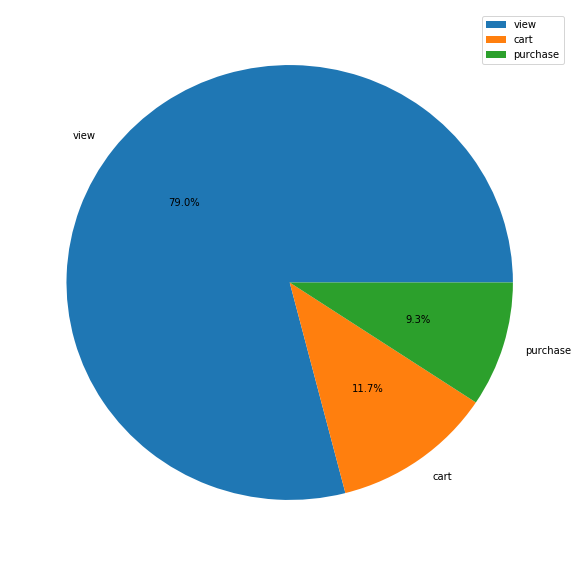

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
labels = 'view', 'cart', 'purchase'
axes.pie(df_sales["event_type"].value_counts().values, autopct='%1.1f%%', labels = labels)
axes.legend(df_sales["event_type"].value_counts().index)

In [30]:
df_sales.groupby(['brand', 'Category', 'price'])['Sub_category_2'].value_counts()

brand   Category     price    Sub_category_2
acer    accessories  12.07    bag               2
                     25.71    bag               1
                     30.86    bag               3
                     36.01    bag               2
                     77.20    bag               3
                                               ..
yamaha  electronics  2088.78  acoustic          1
                     2187.93  acoustic          1
                     2198.71  acoustic          1
                     2202.86  music_tools       2
                     2249.97  acoustic          2
Name: Sub_category_2, Length: 32753, dtype: int64

In [31]:
df_sales.groupby(['Category', 'price'])['brand'].value_counts()

Category     price   brand 
accessories  6.85    xiaomi    1
             7.11    lenovo    1
             8.52    lenovo    7
             9.01    lenovo    6
                     xiaomi    1
                              ..
stationery   93.30   hp        1
             146.70  canon     1
             147.85  hp        1
             166.00  hp        1
             438.85  hp        1
Name: brand, Length: 31086, dtype: int64

In [ ]:
#Visualisation

In [32]:
df_sales.groupby(['Day_of_Week']).Category.value_counts().unstack()

Category,accessories,apparel,appliances,auto,computers,construction,country_yard,electronics,furniture,kids,sport,stationery
Day_of_Week,,,,,,,,,,,,
Friday,53,660,7871,278,3163,516,7,27828,718,34,135,9
Monday,41,392,4534,178,1912,339,6,18718,487,25,111,3
Saturday,60,746,8034,255,3117,496,11,27167,842,39,145,6
Sunday,77,658,8268,274,2890,535,7,25503,738,40,120,7
Thursday,47,422,5241,205,2319,363,8,21706,479,31,90,5
Tuesday,52,391,4938,219,2055,350,5,19966,479,26,148,9
Wednesday,46,373,4737,199,2160,343,8,19915,452,25,129,6


In [33]:
df_sales.groupby(['Day_of_Week']).brand.value_counts().unstack()

brand,acer,apple,arg,ariston,artel,asus,atlant,beko,bosch,braun,...,starline,stels,sv,tcl,tefal,thomas,vitek,vivo,xiaomi,yamaha
Day_of_Week,,,,,,,,,,,,,,,,,,,,,
Friday,732,7744,106,117,724,449,151,333,1041,212,...,223,296,272,101,392,74,439,198,5347,69
Monday,467,5203,57,91,417,255,92,222,587,127,...,146,206,170,50,217,29,275,125,3649,42
Saturday,755,7709,113,115,746,442,160,356,1039,217,...,214,308,300,90,430,70,420,221,5117,89
Sunday,679,7265,129,144,660,412,165,339,1111,246,...,233,296,274,89,466,84,455,167,4722,84
Thursday,523,6279,89,101,508,360,94,249,698,157,...,178,202,201,73,243,37,304,125,4102,39
Tuesday,515,5470,79,95,461,296,86,244,662,138,...,185,265,200,44,225,46,297,128,3887,40
Wednesday,524,5508,63,73,449,323,95,239,617,113,...,164,218,205,64,227,39,278,131,3914,37


In [ ]:
#Insight 2 Day of the week vs Brand - Promotion/ Supply demand analytics


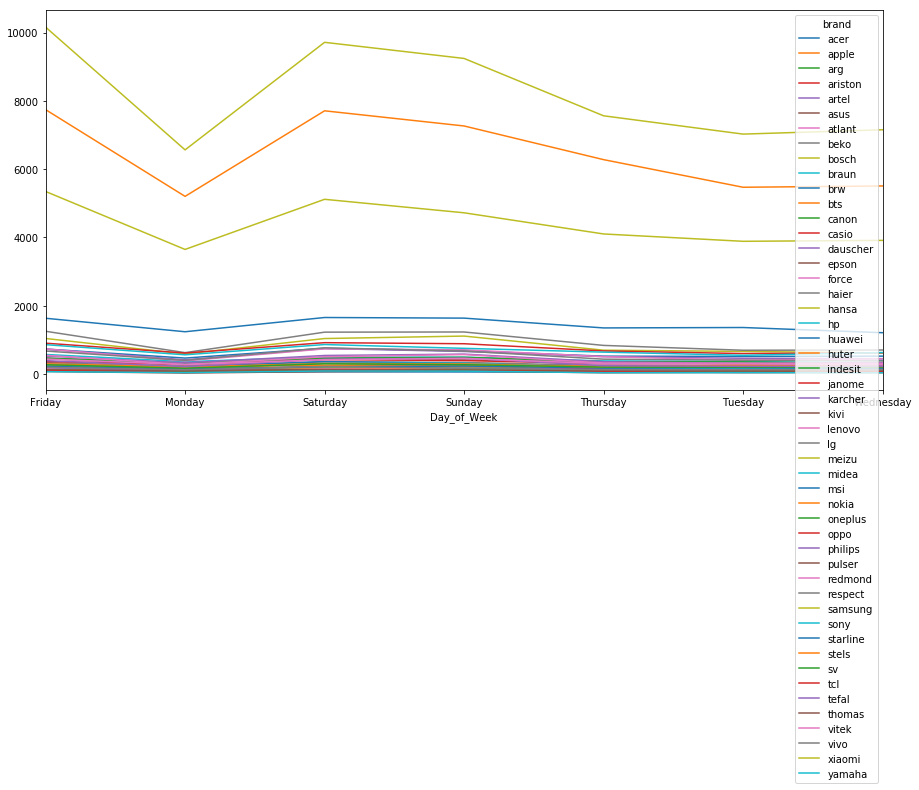

In [34]:
fig, ax = plt.subplots(figsize=(15,7))
df_sales.groupby(['Day_of_Week']).brand.value_counts().unstack().plot(ax=ax)

In [35]:
df_sales.brand.unique()

array(['artel', 'lg', 'philips', 'huawei', 'nokia', 'apple', 'haier',
       'samsung', 'dauscher', 'xiaomi', 'bosch', 'canon', 'sony', 'sv',
       'lenovo', 'tefal', 'oppo', 'acer', 'bts', 'beko', 'vitek',
       'respect', 'ariston', 'vivo', 'asus', 'tcl', 'casio', 'hp',
       'karcher', 'starline', 'indesit', 'redmond', 'janome', 'hansa',
       'pulser', 'midea', 'atlant', 'brw', 'force', 'meizu', 'epson',
       'arg', 'stels', 'huter', 'msi', 'braun', 'yamaha', 'kivi',
       'thomas', 'oneplus'], dtype=object)

In [36]:

brands = ['artel', 'lg', 'philips', 'huawei', 'nokia', 'apple', 'haier',
       'samsung', 'dauscher', 'xiaomi', 'bosch', 'canon', 'sony', 'sv',
       'lenovo', 'tefal', 'oppo', 'acer', 'bts', 'beko', 'vitek',
       'respect', 'ariston', 'vivo', 'asus', 'tcl', 'casio', 'hp',
       'karcher', 'starline', 'indesit', 'redmond', 'janome', 'hansa',
       'pulser', 'midea', 'atlant', 'brw', 'force', 'meizu', 'epson',
       'arg', 'stels', 'huter', 'msi', 'braun', 'yamaha', 'kivi',
       'thomas', 'oneplus']

brands_df = df_sales[df_sales.brand.isin(brands)]
brands_df

,event_type,product_id,category_id,brand,price,user_id,user_session,Event_date,Event_time,Event_timezone,Day_of_Week,Category,Sub_category_1,Sub_category_2
0,view,5016,183,artel,36.01,1095536,5342766,2019-10-11,16:57:06,UTC,Friday,appliances,kitchen,oven
1,view,4240,43,lg,2445.08,1153084,4600705,2019-10-27,14:23:53,UTC,Sunday,electronics,video,tv
2,view,7721,208,philips,257.38,364298,5991663,2019-11-25,12:57:47,UTC,Monday,appliances,environment,vacuum
3,view,597,71,huawei,163.20,3536496,9397681,2019-11-12,19:50:55,UTC,Tuesday,electronics,smartphone,smartphone
4,view,13709,70,nokia,21.85,3542250,8711820,2019-11-13,04:59:13,UTC,Wednesday,electronics,telephone,telephone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235995,cart,16520,91,brw,525.11,350299,566183,2019-11-17,04:43:32,UTC,Sunday,furniture,bedroom,bed
235996,cart,719,71,samsung,298.33,450109,9681143,2019-11-17,16:07:29,UTC,Sunday,electronics,smartphone,smartphone
235997,cart,718,71,samsung,298.07,1516528,3956291,2019-11-17,12:39:00,UTC,Sunday,electronics,smartphone,smartphone
235998,cart,415,71,samsung,94.96,2816015,12343925,2019-11-16,14:02:53,UTC,Saturday,electronics,smartphone,smartphone


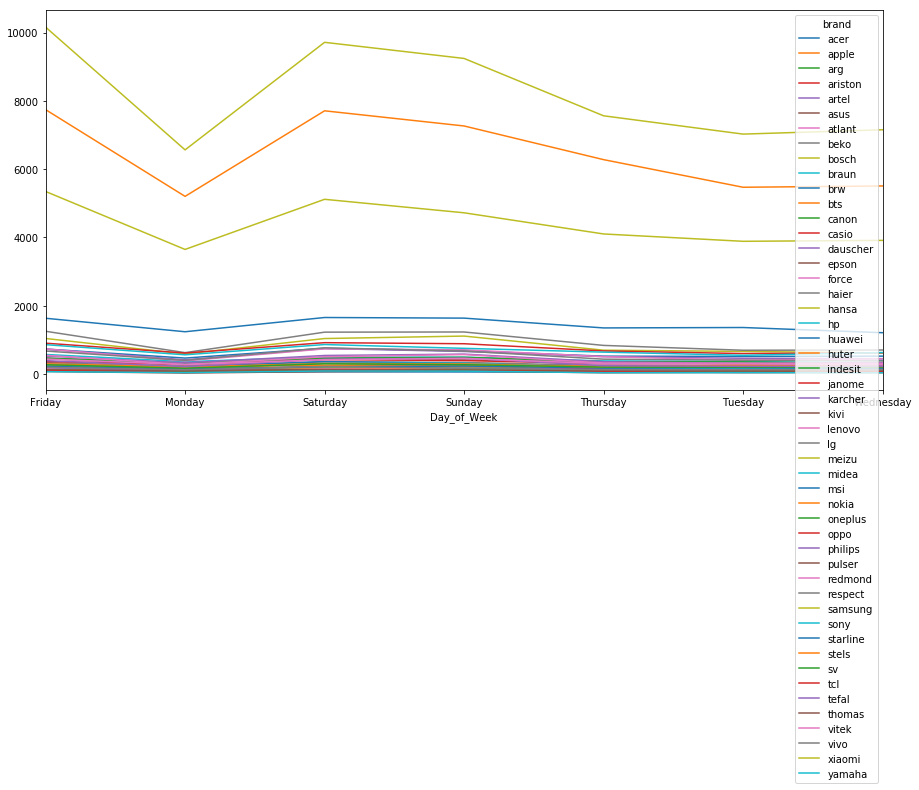

In [37]:
#Total activity(including all 3 view, cart, purchase) per brand for top 5 brands.
fig, ax = plt.subplots(figsize=(15,7))
brands_df.groupby(['Day_of_Week']).brand.value_counts().unstack().plot(ax=ax)

In [38]:
#looking at only the cases where purchases were made
brands_purchases = brands_df[brands_df.event_type.eq('purchase')]
brands_purchases

,event_type,product_id,category_id,brand,price,user_id,user_session,Event_date,Event_time,Event_timezone,Day_of_Week,Category,Sub_category_1,Sub_category_2
7,purchase,7462,177,samsung,384.80,2388173,12418114,2019-11-17,08:10:32,UTC,Sunday,appliances,kitchen,washer
11,purchase,51,71,apple,358.57,1589151,148941,2019-10-10,03:30:54,UTC,Thursday,electronics,smartphone,smartphone
210,purchase,7470,177,samsung,386.08,1128145,11855676,2019-10-16,05:16:41,UTC,Wednesday,appliances,kitchen,washer
230,purchase,896,71,apple,1451.85,3926159,13276903,2019-11-25,12:51:14,UTC,Monday,electronics,smartphone,smartphone
262,purchase,11107,26,apple,308.61,3086794,11897800,2019-11-30,04:11:53,UTC,Saturday,electronics,clocks,clocks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217995,purchase,445,71,apple,763.92,2254635,236068,2019-10-16,11:17:09,UTC,Wednesday,electronics,smartphone,smartphone
217996,purchase,10566,50,apple,165.84,3193793,12513942,2019-11-20,04:11:33,UTC,Wednesday,electronics,audio,headphone
217997,purchase,11188,27,xiaomi,28.42,2621269,8539102,2019-10-13,08:44:03,UTC,Sunday,electronics,smartphone,smartphone
217998,purchase,7186,177,samsung,334.60,842753,476371,2019-10-12,02:18:45,UTC,Saturday,appliances,kitchen,washer


In [39]:
brands_purchases.groupby(['Day_of_Week']).brand.value_counts().unstack()

brand,acer,apple,arg,ariston,artel,asus,atlant,beko,bosch,braun,...,starline,stels,sv,tcl,tefal,thomas,vitek,vivo,xiaomi,yamaha
Day_of_Week,,,,,,,,,,,,,,,,,,,,,
Friday,34.0,797.0,5.0,4.0,36.0,9.0,6.0,19.0,33.0,4.0,...,7.0,18.0,8.0,2.0,22.0,NaN,21.0,10.0,291.0,5.0
Monday,32.0,714.0,4.0,7.0,32.0,8.0,8.0,16.0,23.0,9.0,...,12.0,18.0,4.0,2.0,13.0,1.0,16.0,10.0,284.0,3.0
Saturday,45.0,938.0,9.0,5.0,52.0,13.0,3.0,26.0,30.0,9.0,...,17.0,14.0,11.0,3.0,21.0,4.0,31.0,16.0,379.0,3.0
Sunday,55.0,1295.0,13.0,25.0,56.0,24.0,13.0,41.0,68.0,31.0,...,25.0,22.0,14.0,12.0,50.0,11.0,40.0,18.0,495.0,7.0
Thursday,38.0,736.0,11.0,5.0,44.0,14.0,4.0,16.0,22.0,10.0,...,15.0,11.0,5.0,12.0,12.0,NaN,17.0,7.0,277.0,2.0
Tuesday,20.0,812.0,15.0,10.0,42.0,11.0,1.0,24.0,41.0,5.0,...,6.0,15.0,2.0,3.0,14.0,1.0,15.0,7.0,306.0,3.0
Wednesday,31.0,758.0,3.0,5.0,40.0,12.0,3.0,17.0,27.0,6.0,...,8.0,10.0,6.0,5.0,10.0,1.0,27.0,7.0,318.0,2.0


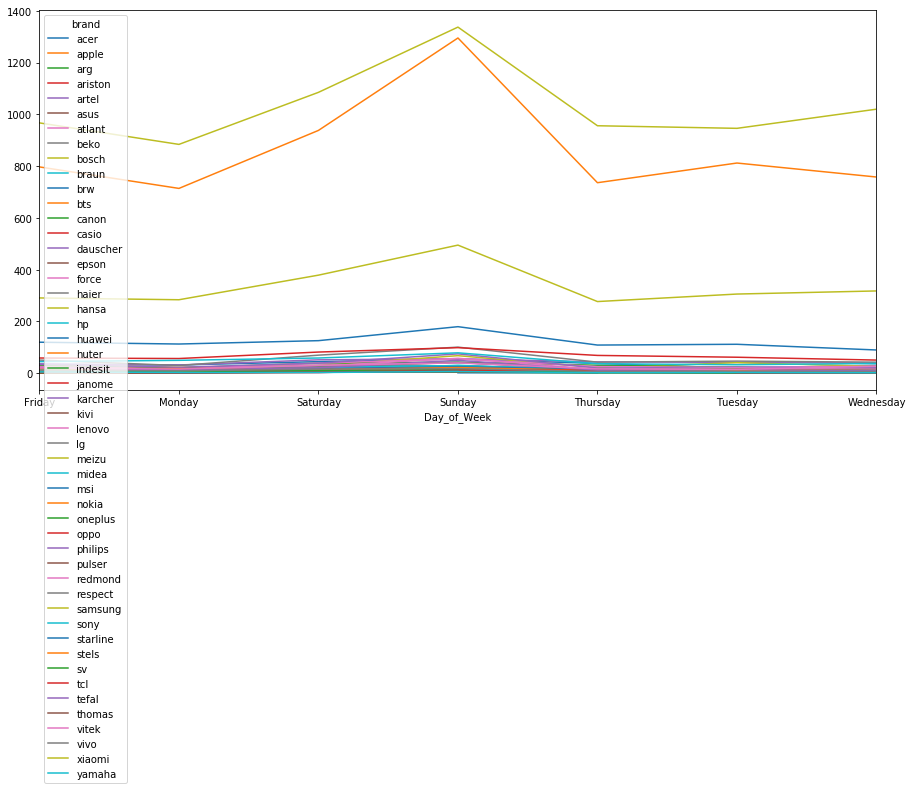

In [40]:
#Total activity(including all 3 view, cart, purchase) per brand for top 5 brands.
fig, ax = plt.subplots(figsize=(15,7))
brands_purchases.groupby(['Day_of_Week']).brand.value_counts().unstack().plot(ax=ax)

In [41]:
brand_avgPrice = brands_df.groupby(['brand']).price.mean()
brand_avgPrice

brand
acer        607.488901
apple       815.468169
arg         124.568239
ariston     146.421739
artel       173.329508
asus        627.247674
atlant      270.510368
beko        257.345545
bosch       266.649308
braun       107.085157
brw         266.737881
bts         283.278681
canon       615.431429
casio       120.306577
dauscher    226.980899
epson       255.843211
force       157.803779
haier       332.603630
hansa       277.723105
hp          480.366605
huawei      252.915842
huter       203.825340
indesit     258.461130
janome      252.715058
karcher     258.197937
kivi        263.217257
lenovo      559.073049
lg          456.872947
meizu       151.826518
midea       194.761147
msi         839.882437
nokia       114.323891
oneplus     682.625105
oppo        290.503998
philips     166.796650
pulser      723.991744
redmond      80.989411
respect      80.455124
samsung     329.296741
sony        422.981388
starline    152.348384
stels        92.833093
sv          299.387016
tcl  

In [42]:
brand_revenue = brands_purchases.groupby(['brand']).price.sum()
brand_revenue

brand
acer         131078.20
apple       4658923.54
arg            6241.77
ariston        7111.48
artel         48754.28
asus          49142.35
atlant         9990.03
beko          37573.58
bosch         48739.95
braun          6958.60
brw            8651.15
bts            7931.30
canon         23291.18
casio          7816.48
dauscher      26459.65
epson         14007.82
force         13595.26
haier         40878.56
hansa         10967.29
hp            46707.00
huawei       172861.65
huter          6581.57
indesit       49486.19
janome        15452.73
karcher       10099.75
kivi          14703.25
lenovo        93989.74
lg           157800.36
meizu          7112.15
midea         16799.01
msi            5323.68
nokia          8917.25
oneplus       12331.97
oppo         106112.61
philips       29278.79
pulser        14656.22
redmond       13332.22
respect       10585.23
samsung     1919502.10
sony         120225.28
starline      12630.53
stels          9820.73
sv            11759.55
tcl  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

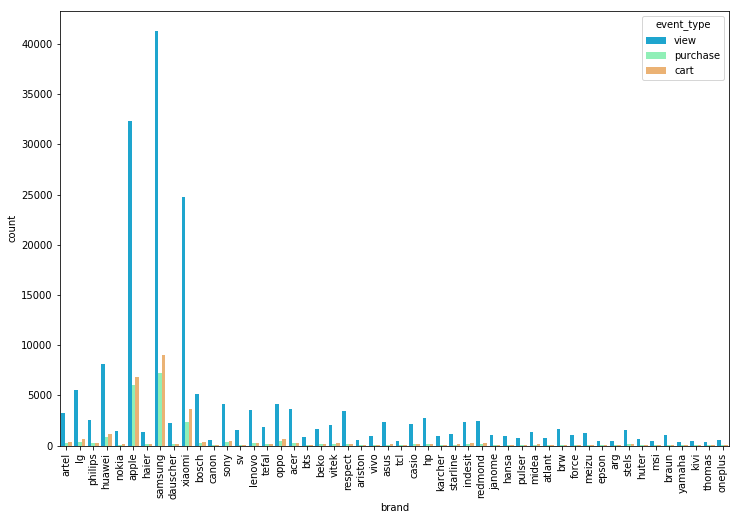

In [43]:
plt.figure(figsize=(12,8))
sns.countplot(x='brand', hue='event_type',data=brands_df, palette="rainbow")
plt.xticks(rotation=90)

In [ ]:
#Brand vs Price for pricing 

In [44]:
#looking at only the cases where purchases were made
Category_sales = df_sales[df_sales.event_type.eq('purchase')]
Category_sales

,event_type,product_id,category_id,brand,price,user_id,user_session,Event_date,Event_time,Event_timezone,Day_of_Week,Category,Sub_category_1,Sub_category_2
7,purchase,7462,177,samsung,384.80,2388173,12418114,2019-11-17,08:10:32,UTC,Sunday,appliances,kitchen,washer
11,purchase,51,71,apple,358.57,1589151,148941,2019-10-10,03:30:54,UTC,Thursday,electronics,smartphone,smartphone
210,purchase,7470,177,samsung,386.08,1128145,11855676,2019-10-16,05:16:41,UTC,Wednesday,appliances,kitchen,washer
230,purchase,896,71,apple,1451.85,3926159,13276903,2019-11-25,12:51:14,UTC,Monday,electronics,smartphone,smartphone
262,purchase,11107,26,apple,308.61,3086794,11897800,2019-11-30,04:11:53,UTC,Saturday,electronics,clocks,clocks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217995,purchase,445,71,apple,763.92,2254635,236068,2019-10-16,11:17:09,UTC,Wednesday,electronics,smartphone,smartphone
217996,purchase,10566,50,apple,165.84,3193793,12513942,2019-11-20,04:11:33,UTC,Wednesday,electronics,audio,headphone
217997,purchase,11188,27,xiaomi,28.42,2621269,8539102,2019-10-13,08:44:03,UTC,Sunday,electronics,smartphone,smartphone
217998,purchase,7186,177,samsung,334.60,842753,476371,2019-10-12,02:18:45,UTC,Saturday,appliances,kitchen,washer


In [45]:
Category_sales.groupby(['Day_of_Week']).Sub_category_2.value_counts()

Day_of_Week  Sub_category_2
Friday       smartphone        1928
             headphone          139
             tv                 125
             vacuum             102
             washer              82
                               ... 
Wednesday    music_tools          1
             player               1
             subwoofer            1
             table                1
             video                1
Name: Sub_category_2, Length: 378, dtype: int64

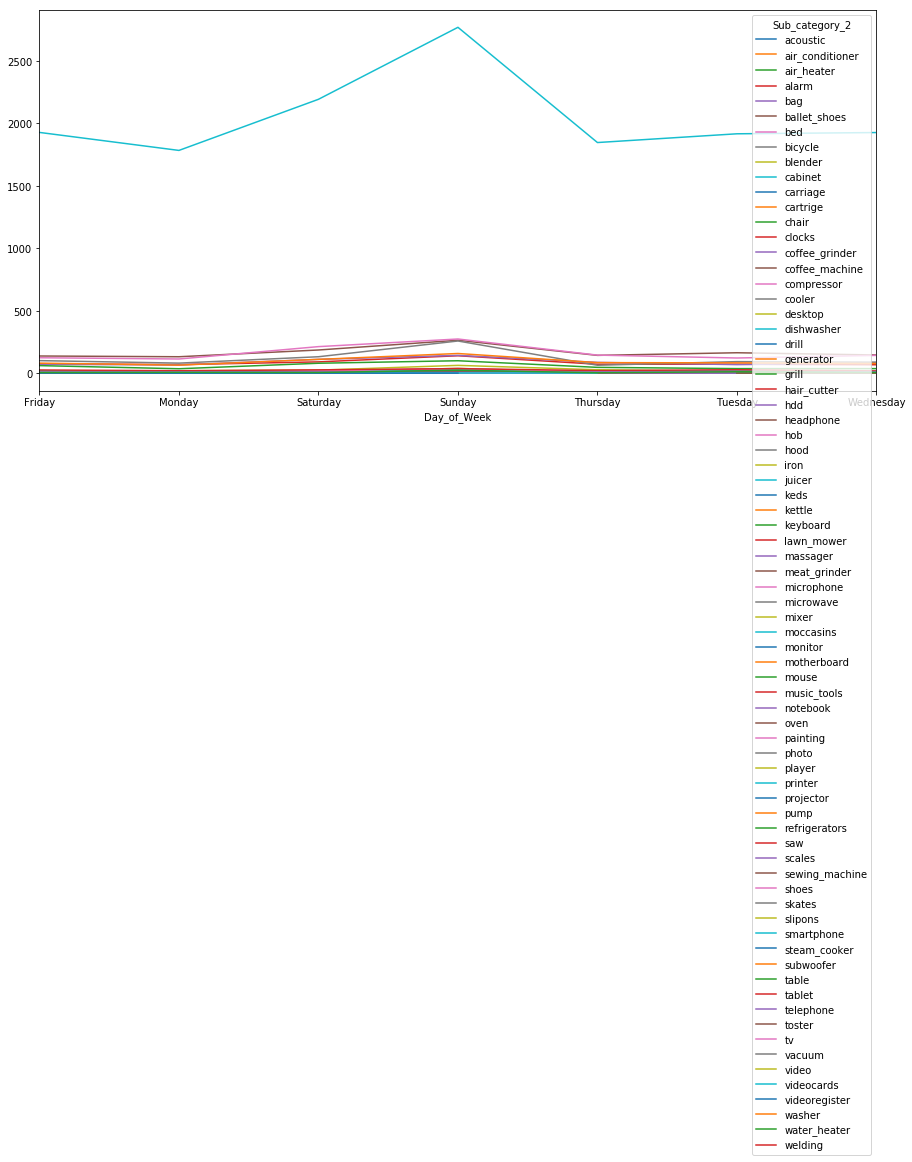

In [46]:
#Total activity(including all 3 view, cart, purchase) per brand for top 5 brands.
fig, ax = plt.subplots(figsize=(15,7))
Category_sales.groupby(['Day_of_Week']).Sub_category_2.value_counts().unstack().plot(ax=ax)

In [57]:
Category_sales.user_session.value_counts()

1717797     4
12080243    3
7211563     2
7886017     2
5153312     2
           ..
12520763    1
9435395     1
8502589     1
5317950     1
5919325     1
Name: user_session, Length: 21811, dtype: int64

In [58]:

user_sess = [12080243 , 12418114,   148941, 11855676, 8539102, 476371, 3739717, 1717797, 7211563, 7886017, 5153312]

In [59]:
#User session
session_behaviour = df_sales[df_sales.user_session.isin(user_sess)]
session_behaviour

,event_type,product_id,category_id,brand,price,user_id,user_session,Event_date,Event_time,Event_timezone,Day_of_Week,Category,Sub_category_1,Sub_category_2
7,purchase,7462,177,samsung,384.80,2388173,12418114,2019-11-17,08:10:32,UTC,Sunday,appliances,kitchen,washer
11,purchase,51,71,apple,358.57,1589151,148941,2019-10-10,03:30:54,UTC,Thursday,electronics,smartphone,smartphone
210,purchase,7470,177,samsung,386.08,1128145,11855676,2019-10-16,05:16:41,UTC,Wednesday,appliances,kitchen,washer
18886,purchase,885,71,apple,1337.23,719891,1717797,2019-11-17,17:01:22,UTC,Sunday,electronics,smartphone,smartphone
79407,purchase,7096,177,indesit,216.17,2938616,5153312,2019-10-25,08:58:10,UTC,Friday,appliances,kitchen,washer
85338,purchase,691,71,samsung,230.31,1657359,12080243,2019-10-10,20:25:10,UTC,Thursday,electronics,smartphone,smartphone
86039,purchase,688,71,samsung,174.75,1881529,7886017,2019-10-01,04:33:15,UTC,Tuesday,electronics,smartphone,smartphone
204506,purchase,629,71,samsung,195.08,3031583,7211563,2019-11-09,04:47:01,UTC,Saturday,electronics,smartphone,smartphone
206450,purchase,691,71,samsung,230.31,1657359,12080243,2019-10-10,20:25:10,UTC,Thursday,electronics,smartphone,smartphone
207285,purchase,43,71,apple,494.22,3031583,7211563,2019-11-09,04:28:57,UTC,Saturday,electronics,smartphone,smartphone


In [60]:
session_behaviour.groupby(['user_id','product_id','brand','user_session']).event_type.value_counts().unstack()

event_type                               purchase
user_id product_id brand   user_session          
719891  872        apple   1717797              1
        885        apple   1717797              3
842753  7186       samsung 476371               1
1128145 7470       samsung 11855676             1
1589151 51         apple   148941               1
1657359 414        samsung 12080243             1
        691        samsung 12080243             2
1881529 688        samsung 7886017              1
        6611       braun   7886017              1
2318662 748        apple   3739717              1
2388173 7462       samsung 12418114             1
2621269 11188      xiaomi  8539102              1
2938616 7096       indesit 5153312              2
3031583 43         apple   7211563              1
        629        samsung 7211563              1

In [62]:
# Brand & Category 
brands_Categories = brands_df.groupby(['brand']).Sub_category_1.unique().reset_index() 
brands_Categories

,brand,Sub_category_1
0,acer,"[desktop, notebook, peripherals, bag, tablet, ..."
1,apple,"[smartphone, audio, clocks, notebook, tablet, ..."
2,arg,"[kitchen, video]"
3,ariston,[environment]
4,artel,"[kitchen, video, environment]"
5,asus,"[notebook, components, desktop, peripherals, a..."
6,atlant,"[kitchen, snowboard]"
7,beko,"[kitchen, environment]"
8,bosch,"[tools, environment, kitchen, iron, ironing_bo..."
9,braun,"[kitchen, iron, personal, ironing_board]"


In [63]:
# Event date - brand sales on each date
brands_purchases.groupby(['Event_date', 'brand']).price.sum().unstack()

brand,acer,apple,arg,ariston,artel,asus,atlant,beko,bosch,braun,...,starline,stels,sv,tcl,tefal,thomas,vitek,vivo,xiaomi,yamaha
Event_date,,,,,,,,,,,,,,,,,,,,,
2019-10-01,257.15,72934.19,90.07,331.32,511.64,116.26,NaN,300.85,700.58,53.98,...,NaN,101.93,NaN,NaN,NaN,NaN,45.25,450.41,4196.50,NaN
2019-10-02,146.46,59097.91,NaN,NaN,222.60,NaN,NaN,NaN,82.37,45.28,...,NaN,131.28,NaN,385.05,NaN,NaN,81.26,308.86,3497.37,NaN
2019-10-03,1775.80,58019.72,NaN,NaN,542.08,294.44,NaN,468.43,816.60,208.43,...,NaN,98.20,NaN,739.99,NaN,NaN,277.74,231.64,4006.36,NaN
2019-10-04,1437.77,92108.56,NaN,NaN,1252.38,669.23,227.29,604.83,340.01,136.38,...,501.95,264.87,NaN,390.74,750.15,NaN,150.92,836.42,6456.13,1029.41
2019-10-05,5474.62,85203.03,NaN,NaN,703.30,NaN,NaN,1119.06,266.52,NaN,...,662.57,275.43,NaN,NaN,473.24,334.60,28.29,1463.72,5823.68,NaN
2019-10-06,1427.85,63899.13,NaN,330.59,623.12,102.71,172.44,1042.12,349.14,117.33,...,278.77,110.43,257.15,NaN,331.96,NaN,200.39,139.75,5532.33,117.09
2019-10-07,1208.78,41149.58,NaN,233.50,1065.99,1383.83,149.04,743.39,911.74,NaN,...,138.23,416.73,76.96,NaN,311.13,NaN,20.34,308.86,5310.01,NaN
2019-10-08,1956.55,50537.26,NaN,305.26,780.31,673.50,257.15,247.60,1743.90,NaN,...,NaN,221.37,NaN,269.20,38.59,NaN,NaN,NaN,6740.68,NaN
2019-10-09,720.48,55426.07,NaN,103.08,441.01,NaN,257.15,180.16,181.34,NaN,...,NaN,77.22,771.96,NaN,NaN,334.42,51.43,231.64,5170.87,NaN


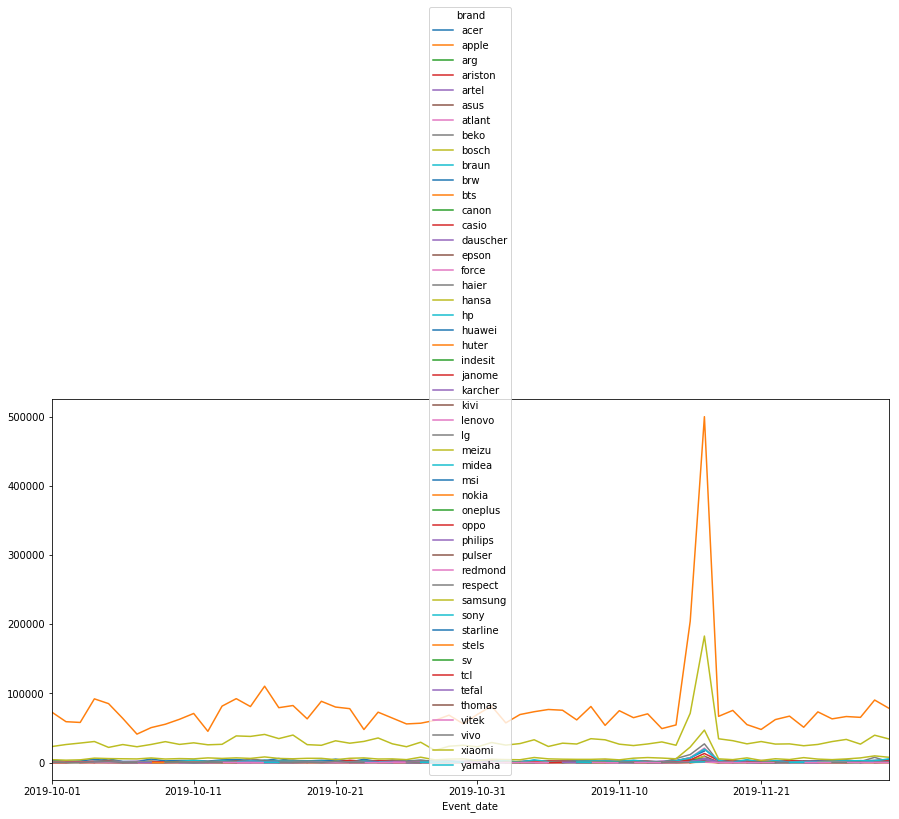

In [64]:
#Total Sales per brand for each date.
fig, ax = plt.subplots(figsize=(15,7))
brands_purchases.groupby(['Event_date', 'brand']).price.sum().unstack().plot(ax=ax)

In [ ]:
# Brand purchases drilled down to each hour of each Day of the week for top brands to use in Dynamic Pricing 

In [65]:
brands_purchases['Event_hour'] = brands_purchases.Event_time.apply(lambda x: datetime.strptime(x, '%H:%M:%S').hour)

C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
brands_purchases.head()

,event_type,product_id,category_id,brand,price,user_id,user_session,Event_date,Event_time,Event_timezone,Day_of_Week,Category,Sub_category_1,Sub_category_2,Event_hour
7,purchase,7462,177,samsung,384.80,2388173,12418114,2019-11-17,08:10:32,UTC,Sunday,appliances,kitchen,washer,8
11,purchase,51,71,apple,358.57,1589151,148941,2019-10-10,03:30:54,UTC,Thursday,electronics,smartphone,smartphone,3
210,purchase,7470,177,samsung,386.08,1128145,11855676,2019-10-16,05:16:41,UTC,Wednesday,appliances,kitchen,washer,5
230,purchase,896,71,apple,1451.85,3926159,13276903,2019-11-25,12:51:14,UTC,Monday,electronics,smartphone,smartphone,12
262,purchase,11107,26,apple,308.61,3086794,11897800,2019-11-30,04:11:53,UTC,Saturday,electronics,clocks,clocks,4


In [67]:
brands_purchases.groupby(['Day_of_Week','brand']).Event_hour.value_counts()

Day_of_Week  brand   Event_hour
Friday       acer    12            5
                     9             3
                     10            3
                     18            3
                     3             2
                                  ..
Wednesday    xiaomi  22            5
                     21            2
                     23            1
             yamaha  10            1
                     16            1
Name: Event_hour, Length: 3504, dtype: int64

In [68]:
brands_purchases.groupby(['Day_of_Week','brand', 'Event_hour']).Event_hour.value_counts()

Day_of_Week  brand   Event_hour  Event_hour
Friday       acer    3           3             2
                     4           4             2
                     6           6             2
                     7           7             2
                     8           8             2
                                              ..
Wednesday    xiaomi  21          21            2
                     22          22            5
                     23          23            1
             yamaha  10          10            1
                     16          16            1
Name: Event_hour, Length: 3504, dtype: int64

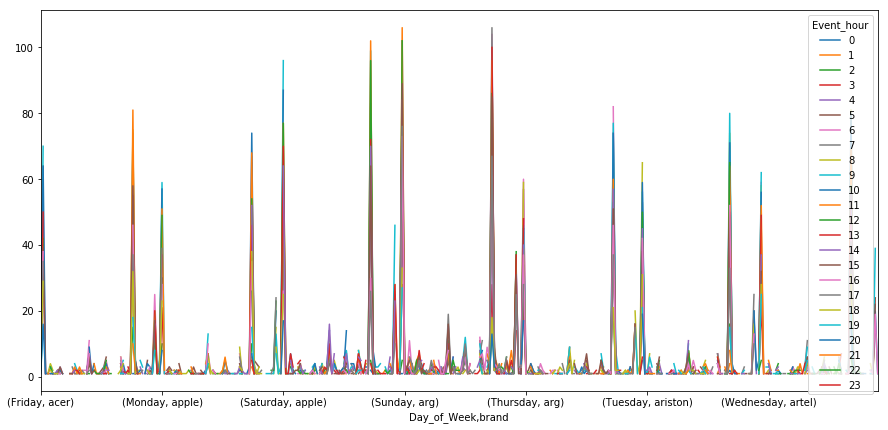

In [69]:
fig, ax = plt.subplots(figsize=(15,7))
brands_purchases.groupby(['Day_of_Week','brand']).Event_hour.value_counts().unstack().plot(ax=ax)

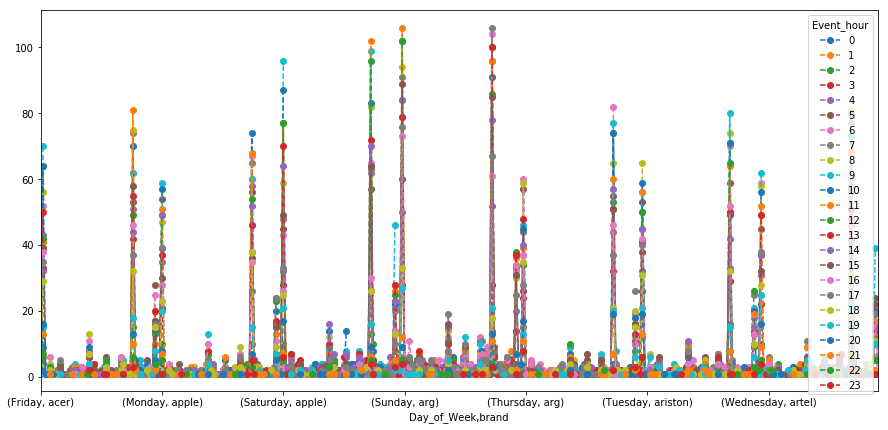

In [70]:
fig, ax = plt.subplots(figsize=(15,7))
brands_purchases.groupby(['Day_of_Week','brand']).Event_hour.value_counts().unstack().plot(ax=ax, style='--o')

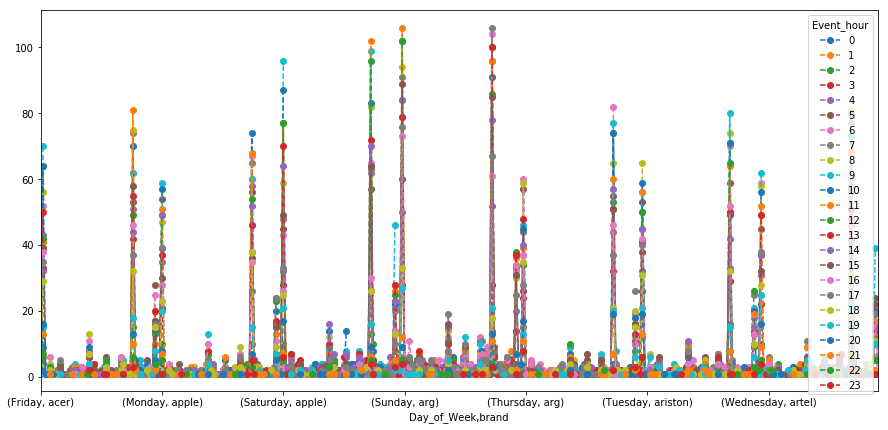

In [71]:
fig, ax = plt.subplots(figsize=(15,7))
brands_purchases.groupby(['Day_of_Week','brand']).Event_hour.value_counts().unstack().plot(ax=ax, style='--o')

In [72]:
brands_purchases_fri = brands_purchases[brands_purchases.Day_of_Week.eq('Friday')]
brands_purchases_fri.head(10)

,event_type,product_id,category_id,brand,price,user_id,user_session,Event_date,Event_time,Event_timezone,Day_of_Week,Category,Sub_category_1,Sub_category_2,Event_hour
438,purchase,639,71,samsung,250.91,2411256,7370065,2019-10-11,07:17:52,UTC,Friday,electronics,smartphone,smartphone,7
538,purchase,28,71,apple,565.78,3387216,8883172,2019-11-08,17:08:04,UTC,Friday,electronics,smartphone,smartphone,17
1110,purchase,623,71,xiaomi,187.98,556710,11077249,2019-10-11,19:18:21,UTC,Friday,electronics,smartphone,smartphone,19
2238,purchase,655,71,xiaomi,133.50,1757692,4254494,2019-10-04,15:34:11,UTC,Friday,electronics,smartphone,smartphone,15
3306,purchase,10566,50,apple,160.88,565636,8362044,2019-10-11,20:51:11,UTC,Friday,electronics,audio,headphone,20
3446,purchase,8975,5,vitek,72.00,542158,1698713,2019-10-11,11:16:36,UTC,Friday,appliances,environment,vacuum,11
3530,purchase,11188,27,xiaomi,28.56,1337180,9231560,2019-10-04,13:48:45,UTC,Friday,electronics,smartphone,smartphone,13
3720,purchase,707,71,samsung,128.41,468939,5077619,2019-11-08,06:10:13,UTC,Friday,electronics,smartphone,smartphone,6
4053,purchase,915,71,xiaomi,200.01,566768,11288788,2019-11-22,07:23:21,UTC,Friday,electronics,smartphone,smartphone,7
5538,purchase,844,71,samsung,1010.31,532005,12160126,2019-10-11,11:16:09,UTC,Friday,electronics,smartphone,smartphone,11


In [73]:
brands_purchases_fri.groupby(['brand']).Event_hour.value_counts().unstack()

Event_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
brand,,,,,,,,,,,,,,,,,,,,,
acer,NaN,NaN,NaN,2.0,2.0,NaN,2.0,2.0,2.0,3.0,...,1.0,NaN,2.0,2.0,3.0,1.0,2.0,NaN,NaN,NaN
apple,4.0,6.0,9.0,33.0,43.0,39.0,52.0,64.0,56.0,70.0,...,32.0,39.0,38.0,35.0,29.0,15.0,16.0,13.0,7.0,NaN
arg,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
ariston,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artel,NaN,NaN,NaN,3.0,1.0,2.0,3.0,2.0,4.0,3.0,...,1.0,NaN,6.0,NaN,2.0,1.0,1.0,1.0,NaN,NaN
asus,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,1.0,...,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
atlant,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
beko,NaN,NaN,NaN,1.0,1.0,2.0,2.0,1.0,NaN,1.0,...,2.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
bosch,1.0,NaN,1.0,2.0,3.0,2.0,1.0,2.0,1.0,2.0,...,1.0,3.0,1.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN


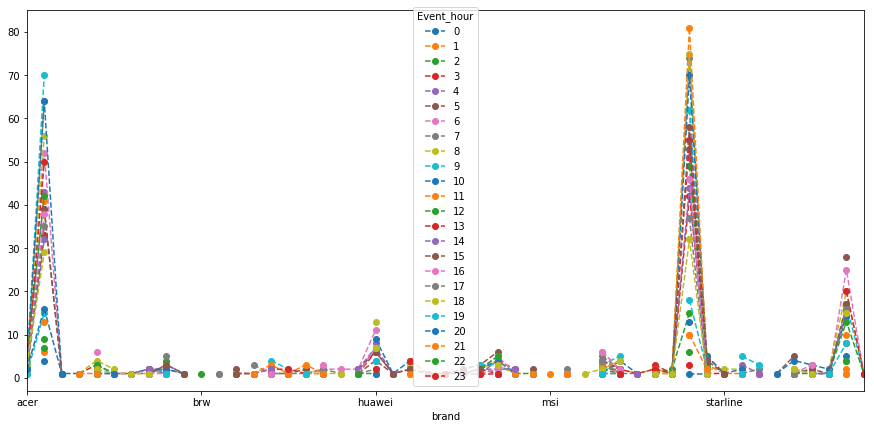

In [74]:
fig, ax = plt.subplots(figsize=(15,7))
brands_purchases_fri.groupby(['brand']).Event_hour.value_counts().unstack().plot(ax=ax, style='--o')

In [75]:
df_sales.shape

(236000, 14)

In [76]:
df_sales_wrangled = df_sales

In [77]:
df_sales_wrangled['Event_hour'] = df_sales_wrangled.Event_time.apply(lambda x: datetime.strptime(x, '%H:%M:%S').hour)

In [78]:
df_sales_wrangled.head()

,event_type,product_id,category_id,brand,price,user_id,user_session,Event_date,Event_time,Event_timezone,Day_of_Week,Category,Sub_category_1,Sub_category_2,Event_hour
0,view,5016,183,artel,36.01,1095536,5342766,2019-10-11,16:57:06,UTC,Friday,appliances,kitchen,oven,16
1,view,4240,43,lg,2445.08,1153084,4600705,2019-10-27,14:23:53,UTC,Sunday,electronics,video,tv,14
2,view,7721,208,philips,257.38,364298,5991663,2019-11-25,12:57:47,UTC,Monday,appliances,environment,vacuum,12
3,view,597,71,huawei,163.20,3536496,9397681,2019-11-12,19:50:55,UTC,Tuesday,electronics,smartphone,smartphone,19
4,view,13709,70,nokia,21.85,3542250,8711820,2019-11-13,04:59:13,UTC,Wednesday,electronics,telephone,telephone,4


In [79]:
df_sales_wrangled.to_csv('2019_Ecomm_Sales_Data.csv')

In [80]:
# Dataset for Demographic Information 

In [81]:
users = df_sales_wrangled.user_id.unique()

In [87]:
df_users_info = pd.DataFrame()
df_users_info['user_id'] = users
df_users_info.head(10)

,user_id
0,1095536
1,1153084
2,364298
3,3536496
4,3542250
5,1246770
6,468520
7,2388173
8,2382829
9,2162691


In [89]:
import numpy as np
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]


In [90]:
df_users_info['State'] = np.random.choice(states, size = df_users_info.shape[0])

In [92]:
df_users_info['User_Score'] = np.random.randint(1, 5, size = df_users_info.shape[0])

In [94]:
df_users_info.head(10)

,user_id,State,User_Score
0,1095536,PA,3
1,1153084,CT,4
2,364298,HI,3
3,3536496,NH,3
4,3542250,NV,1
5,1246770,AR,1
6,468520,CA,1
7,2388173,MT,2
8,2382829,ME,1
9,2162691,ME,2


In [95]:
df_users_info.to_csv('2019_user_details.csv')